# Logistic Perceptron Learner

## First Probability and Logarithms
Probability is the study of randomness and uncertainty. For the sake of a mathemetical interpretation, it is a measure of the likelihood that an event will occur. This is ratio of the event to the sample set. This sample set is the set of all possible outcomes.

* $\mathcal{S}$ : sample set
* $\mathcal{E}$ : set of an event such that $\mathcal{E} \subseteq \mathcal{S}$
* $p = \frac{|\mathcal{E}|}{|\mathcal{S}|}$ : the probability of an event and $0 \leq p \leq 1$
* $1 - p$ : the probability of an event not occurring is.

This particular probability distribution would be a Bernouli distribution.

* $\mathcal{X}\sim \mathit{Bern}(p)$ :is this a special case of the binomial distribution where n = 1.   $\mathcal{X}\sim \mathit{Bin}(n , p)$ 
Both of these ditributions are discrete which is favorable for our classification outcomes.

* $f(k;p) = \begin{cases}
  p & \text{ if } k= 1\\ 
  q = 1-p& \text{ if } k=0 
 \end{cases}$ 

With this we can now define odds which is simply the ratio the probability of an event occurring to the probability of the event not occuring.
* $odds_{p} = \frac{p}{1-p} $ 
some examples of odds would be:

odds of a fair coin flip = 0.5/0.5 = 1 or 1:1

odds of a fair coin die the roll  = 0.333/0.666 = 1/1 or 1:2

In logistic perceptron learner we are learning the unkown p for any given linear combination of features

* $x \in \mathbb{R^{d+1}}$

In the classic perceptron model we are learning the weights for a linear combination of features

* $ \hat{y} = \sum_{i=1}^{d} w_{i}x_{i} +b  = \sum_{i=1}^{d+1} w_{i}x_{i} = w^{T}x $  to get $ \mathcal{y} \in \{  -1 ,1 \}$ or  $\{  0 , 1 \}$


we then update the weights if miscalssified via
* $w_{t+1} = w_{t} - \alpha\nabla f_{t}$.

From the loss function we get the gradient
* $ h(w) = \frac{1}{2}\Sigma(\hat{y} - y)^2$ 
* $\frac{\partial L}{\partial w} = \frac{\partial L}{\partial z}\frac{\partial z}{\partial w} = \nabla f_{t} = (\hat{y}-y)x^{i}$
 
  $x^{i}$ = $\begin{pmatrix} x_{1}\\  
              x_{2} \\ 
              \vdots \\
              x_{n} 
              \end{pmatrix}$

And we are also learning

* $p$ which is $\hat{p}$ : since our algorithm only gets $g \approx f$
The function that links the linear combination of our variables,(features) and the Bernoulis probability distrbution is the logit. In more formal terms a function that maps our linear combination to a bernoulis distribution.

* $ln(\frac{p}{1-p}) = o$ : is the logit which is also $ln(p)- ln(1-p)$ from laws of logarithims 

and another logarithm reminder ln(x) = $log_{e}(x)$


when the logit function is graphed we get. 

![logit function](logit2.png)

The first thing that is apparent is that
* domain is $x \in (0,1)$ and range is $y \in ( -\infty, \infty ) $

However we want the probabilities to be on the dependent variable. the can be achieved by taking ithe inverse of the logit function.

* $e^{log_{e}\frac{p}{1-p}} = e^{o}$ 
we end up with 
* $\frac{1}{1+e^{-o}}$

the graph basically makes x into y and y into x

![sigmoid function](sigmoid.png)


This function is a sigmoid function that would return values only between 0 and 1 which makes it a probabilistic
function. if our input of the function is outr linear conbination we now have a mapping from linear conination to p. Algebraically we can show that 

* $\frac{p}{1-p} = e^{z}$ : which is $\frac{p}{1-p} = e^{w^{T}x}$

solvng for p we then get 

* $p = \frac{e^{w^{T}x}}{1 + e^{w^{T}x}} $

* $\frac{e^{w^{T}x}}{1 + e^{w^{T}x}}$ is the same as  $\frac{1}{1 + e^{-w^{T}x}}$ 

* $ \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$

The composition of function for logistic perceptron is 

* $(\sigma \circ h)(w) = \alpha(h(w))$ 

if $\sigma(z) \geq 0.5$ ,$\mu(y|x;w) = 1$    
if $\sigma(z) < 0.5$ $ , \mu(y|x;w) = 0$   
  
 
while the loss function is 
* $L(w) = \frac{1}{2}\sigma_{i=1}^{d+1}((\hat{y}- y)^2$
the same update is used with a slight change since due to the compistion of the functions

* $w_{t+1} = w_{t} - \alpha\nabla f_{t}$ 
where 
* $\frac{\partial L}{\partial w}= \frac{\partial L}{\partial \sigma}  \frac{\partial \sigma}{\partial z} \frac{\partial z}{\partial w} = \nabla f_{t} $

Since this is a composite function we are taking the partial derivative we get 
* $\frac{\partial L}{\partial w} = \frac{\partial }{\partial w}( \frac{1}{2}(\hat{y}-y)^2)$

To show the partial derivative we have already estasblished the relation between $\hat{y} , \sigma(z) and \frac{1}{1 + e^{-z}} $

* $\frac{\partial L}{\partial w} = \frac{\partial }{\partial w}( \frac{1}{2}((\frac{1}{1 + e^{-w^{T}x}})-y)^2)$

we then get 

*$\nabla f_{t} = (\hat{y}-y)\frac{\partial L}{\partial w}\frac{1}{1 + e^{-w^{T}x}} = (\hat{y}-y)\frac{\partial L}{\partial w}(1 + e^{-w^{T}x})^{-1}$
* $(\hat{y}-y)\frac{\partial L}{\partial w}(1 + e^{-w^{T}x})^{-1}
  = (\hat{y}-y)\frac{e^{-w^{T}x}}{(1 + e^{-w^{T}x})^{-2}}x$

we could rewrite the expression by adding 0 in terms of 1 - 1

* $(\hat{y}-y)\frac{1 + e^{-w^{T}x} -1 }{(1 + e^{-w^{T}x})^{2}}x$
* $(\hat{y}-y)\frac{1 + e^{-w^{T}x} -1 }{(1 + e^{-w^{T}x})^{2}}x$
* $(\hat{y}-y)(\frac{1}{1 + e^{-w^{T}x}}-\frac{1}{(1 + e^{-w^{T}x})^{2}})x$
* $(\hat{y}-y)(\frac{1}{1 + e^{-w^{T}x}}(1-\frac{1}{(1 + e^{-w^{T}x})})x$ 

since $\frac{1}{1 + e^{-w^{T}x}} = \sigma(z)$  we get 
* $\nabla f_{t} = (\hat{y}-y)\sigma(z)(1 - \sigma(z))x$

Our update rule,  $w_{t+1} = w_{t} + \alpha\nabla f_{t}$ is

$w_{t+1} = w_{t} -\alpha(\hat{y}-y)\sigma(z)(1 - \sigma(z))x$


The output is a vector with probabilities. 

In [5]:
#In this data set se will be looking at nba players how are still in the league after 5yrs worth of stats 
#gathered about them


using Plots, CSV

nba = CSV.read("nba_logreg.csv")

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made
,String⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5
2,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7
3,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4
4,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1
5,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0
6,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3
7,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0
8,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4
9,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1


In [7]:
# zero is if they are not in the nba after 5yrs and 1 is there are in the nba after 5yrs
nba[21]

1340-element Array{Union{Missing, Float64},1}:
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 ⋮  
 0.0
 0.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 0.0
 1.0
 1.0

In [9]:
#we want to see if we can predict if a playe makes it past 5yrs or not. 
data = [x for x in zip(nba[2], nba[3], nba[21])]

1340-element Array{Tuple{Int64,Float64,Float64},1}:
 (36, 27.4, 0.0)
 (35, 26.9, 0.0)
 (74, 15.3, 0.0)
 (58, 11.6, 1.0)
 (48, 11.5, 1.0)
 (75, 11.4, 0.0)
 (62, 10.9, 1.0)
 (48, 10.3, 1.0)
 (65, 9.9, 0.0) 
 (42, 8.5, 0.0) 
 (35, 6.9, 0.0) 
 (40, 6.7, 1.0) 
 (27, 6.6, 1.0) 
 ⋮              
 (73, 18.9, 0.0)
 (40, 15.4, 0.0)
 (82, 18.9, 1.0)
 (82, 18.3, 1.0)
 (50, 16.3, 1.0)
 (79, 16.1, 0.0)
 (80, 15.8, 0.0)
 (80, 15.8, 0.0)
 (68, 12.6, 1.0)
 (43, 12.1, 0.0)
 (52, 12.0, 1.0)
 (47, 11.7, 1.0)

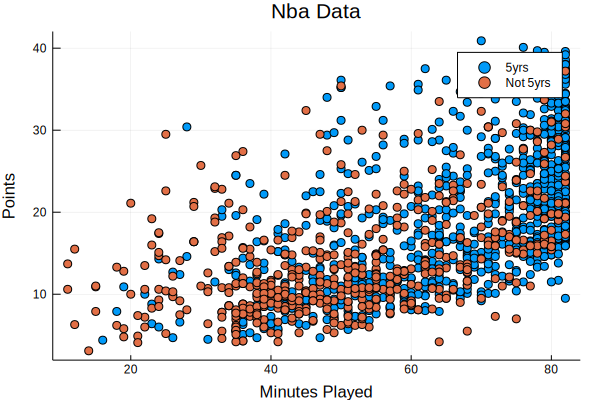

In [10]:
#We can not fit a linear model here

scatter([x[1:2] for x in data if x[3] == 1.0], label = "5yrs")
scatter!([x[1:2] for x in data if x[3] != 1.0], label = "Not 5yrs")
plot!(title = "Nba Data", xlabel = "Minutes Played", ylabel = "Points")

In [39]:
data[101:150]

50-element Array{Tuple{Int64,Float64,Float64},1}:
 (73, 11.0, 0.0)
 (15, 10.9, 0.0)
 (64, 10.9, 1.0)
 (56, 10.6, 0.0)
 (64, 10.6, 0.0)
 (68, 10.1, 1.0)
 (47, 10.0, 0.0)
 (52, 9.8, 1.0) 
 (64, 9.5, 0.0) 
 (34, 10.8, 0.0)
 (42, 9.5, 1.0) 
 (50, 9.3, 1.0) 
 (52, 7.3, 1.0) 
 ⋮              
 (75, 17.9, 1.0)
 (72, 17.0, 0.0)
 (79, 16.8, 1.0)
 (25, 10.4, 0.0)
 (81, 15.9, 1.0)
 (63, 14.0, 1.0)
 (81, 13.8, 1.0)
 (61, 13.2, 1.0)
 (43, 13.0, 0.0)
 (55, 12.9, 1.0)
 (59, 12.4, 0.0)
 (66, 11.3, 1.0)

In [43]:
#trianing data
train_X, train_Y = [[x[1], x[2]] for x in data[1:100]], [x[3] for x in data[1:100]]

(Array{Float64,1}[[36.0, 27.4], [35.0, 26.9], [74.0, 15.3], [58.0, 11.6], [48.0, 11.5], [75.0, 11.4], [62.0, 10.9], [48.0, 10.3], [65.0, 9.9], [42.0, 8.5]  …  [47.0, 14.3], [37.0, 13.6], [62.0, 13.3], [62.0, 12.5], [51.0, 11.9], [36.0, 11.8], [74.0, 11.6], [63.0, 11.6], [33.0, 10.8], [54.0, 11.2]], [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0  …  0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0])

In [68]:
#testing data
test_X, test_Y = [[x[1], x[2]] for x in data[101:150]], [x[3] for x in data[101:150]]

(Array{Float64,1}[[73.0, 11.0], [15.0, 10.9], [64.0, 10.9], [56.0, 10.6], [64.0, 10.6], [68.0, 10.1], [47.0, 10.0], [52.0, 9.8], [64.0, 9.5], [34.0, 10.8]  …  [79.0, 16.8], [25.0, 10.4], [81.0, 15.9], [63.0, 14.0], [81.0, 13.8], [61.0, 13.2], [43.0, 13.0], [55.0, 12.9], [59.0, 12.4], [66.0, 11.3]], [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0  …  1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0])

In [57]:
train_X

100-element Array{Array{Float64,1},1}:
 [36.0, 27.4]
 [35.0, 26.9]
 [74.0, 15.3]
 [58.0, 11.6]
 [48.0, 11.5]
 [75.0, 11.4]
 [62.0, 10.9]
 [48.0, 10.3]
 [65.0, 9.9] 
 [42.0, 8.5] 
 [35.0, 6.9] 
 [40.0, 6.7] 
 [27.0, 6.6] 
 ⋮           
 [76.0, 15.4]
 [55.0, 14.9]
 [47.0, 14.3]
 [37.0, 13.6]
 [62.0, 13.3]
 [62.0, 12.5]
 [51.0, 11.9]
 [36.0, 11.8]
 [74.0, 11.6]
 [63.0, 11.6]
 [33.0, 10.8]
 [54.0, 11.2]

In [52]:
h(w,train_X[9])

1

In [46]:
#predictor function
function predict(x,w)
    x_new = copy(x)
    push!(x_new,1.0)
    return w'*x_new
end

predict (generic function with 1 method)

In [61]:
w = rand(3)

function σ(s)
    return 1/(1 +exp(-s))
end   

function logistic_perception!(x, y, w, α)
    # to make a 1 to correspond to the bais
    new_x = copy(x)
    new_x = [1.0, x[1], x[2]]
    #in vector form w'*new_x
    z = w' * new_x
    y_hat = σ(z)
    if y_hat < 0.5 && y == 1 
        w-= α* (y-y_hat)*σ(z)*(1 - σ(z))*new_x
    end
    return w
end

logistic_perception! (generic function with 1 method)

In [60]:
for _ in 1:10000
    for i in 1 :100
       logistic_perception!(train_X[i], train_Y[i] ,w,0.45)  
    end
end

In [64]:
σ(predict(train_X[2],w))

0.999999998350017

In [69]:
σ(predict(test_X[15],w))

0.9999982477976892

In [70]:
σ(predict(test_X[3],w))

0.9999999995470104